# TAREA 2: SEGMENTACIÓN

<a id = "toc"></a>
# Índice
[Objetivos del notebook](#objetivos)

[Importación de las principales librerías](##import_modules)

[Importación de los datos](#import_data)

[Exploratory Data Analysis (EDA)](#eda)

---> [EDA df comercial](#df1)

---> [EDA df_socio](#df2)

---> [EDA products df](#df3)

[Data Preparation](#dataprep)

[Transformación y limpieza de variables](#transf)

[Creación de nuevas variables](#creacion)

---> [Con producto](#V1)

---> [Tipo de producto](#V2)

---> [EsEspañol](#V3)

---> [Número de cobros](#V4)

---> [Altas y Bajas](#V5)

---> [EDA payments df](#df3)

[Creación del pipline](#pipline)

[KMeans](#Knn)

[Presentación de resultados : Ficha del cliente](#resultados)

---> [Relación de tipos de producto por segmento](#rel1)

---> [Actividad en la web por segmento](#rel2)

---> [Edad por Segmento](#rel3)

---> [Sexo por Segmento](#rel4)






<a id = "objetivos"></a>
# Objetivos del notebook
[Volver al índice](#toc)

En este notebook detallamos el proceso seguido para la segmentación de los clientes de EasyMoney con el objetivo de orientar la actividad comercial de la empresa y poder ayudar a definir un plan de marketing basado en el análisis de los datos existentes.



<a id = "import_modules"></a>
# Importación de las principales librerías
[Volver al índice](#toc)

In [ ]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")
# operating system
import os
# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd
# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
%matplotlib inline

# python core library for machine learning and data science
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans


RANDOM_STATE = 175
import os

from google.colab import drive


<a id = "import_data"></a>
# Importación de los datos
[Volver al índice](#toc)


In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df_comercial=pd.read_csv("gdrive/MyDrive/EASY_MONEY_NUCLIO/data/commercial_activity_df.csv",index_col=0)
df_socio=pd.read_csv("gdrive/MyDrive/EASY_MONEY_NUCLIO/data/sociodemographic_df.csv",index_col=0)
df_products=pd.read_csv("gdrive/MyDrive/EASY_MONEY_NUCLIO/data/products_df.csv",index_col=0)

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)
[Volver al índice](#toc)


Para realizar la tarea de segmentación se utlizaran los tres ficheros de los que disponemos. Previamente en el Notebook Tarea 1: ANALISIS se ha hecho un EDA detallado de los tres ficheros. Es por eso que el EDA para esta tarea se limita a hacer un breve reporte.

<a id = "df1"></a>
# EDA df_comercial
[Volver al índice](#toc)


In [ ]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print('El dataset tiene {} observaciones y {} columnas'.format(df.shape[0],df.shape[1]))
    print()
    print(f"Tenemos un total de {total_nulos} nulos")
    print()
    customer_id = df["pk_cid"].nunique()
    print(f'''Tenemos un total de {customer_id} clientes únicos''')

In [ ]:
report_df(df_comercial)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB
None

El dataset tiene 5962924 observaciones y 6 columnas

Tenemos un total de 266977 nulos

Tenemos un total de 456373 clientes únicos


<a id = "df2"></a>
# EDA df_socio
[Volver al índice](#toc)


In [ ]:
report_df(df_socio)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB
None

El dataset tiene 5962924 observaciones y 8 columnas

Tenemos un total de 1514392 nulos

Tenemos un total de 456373 clientes únicos


<a id = "df3"></a>
# EDA products_df
[Volver al índice](#toc)


In [ ]:
report_df(df_products)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB
None

El dataset tiene 5962924 observaciones y 17 columnas

Tenemos un total de 122 nulos

Tenemos un total de 456373 clientes únicos


<a id = "dataprep"></a>
# Data Preparation
[Volver al índice](#toc)


Hemos analizado los 3 datasets claves con los que vamos a trabajar. En esta sección del notebook **iremos agregando el dataset nuevos atributos** para posteriormente,  poder generar un nuevo dataset. El objetivo es que cada fila contenga información correspondiente a un único cliente y cada columna contenga todas aquellas métricas que se han considerado interesantes, desde el punto de vista de negocio, para realizar la segmentación.

Definamos que podemos considerar a priori 5 categorías de clientes según su relación con los productos:
·         Clientes Fidelizados (con productos activos en la última partición)
·         Clientes No Fidelizados(siguen en DB pero dieron de baja sus productos y en la última partición no tienen activos)
·         Clientes Perdidos(se dan de baja en DB) 
·         Fugas: (clientes que tuvieron un producto activo y se dieron de baja en DB, entendemos que pueden estar en la competencia).
·         Clientes  probables (no tienen ningún producto, pero o bien han manifestado interés navegando en la web o por características similares a grupos de clientes fidelizados podrían estar interesados en determinados productos). También podrías ser un cliente fidelizado que tienen algún producto activo y por asociación y similitud a otro clientes pueden estar interesados en otro producto.

Comenzamos realizando un merge de nuestros tres datasets de partida y corrigiendo algunos datos en formato incorrecto.

Recordamos aspectos básicos de nuestro primer EDA: El máximo de veces que un ID de cliente aparece es 17. Corresponde al número de particiones. Los pk_cid aparecen una única vez por partición.


In [ ]:
_df1= pd.merge(df_products,df_comercial, how="inner",on=['pk_cid','pk_partition' ])
df_tot=pd.merge(_df1,df_socio, how="inner",on=['pk_cid','pk_partition'])
del _df1

In [ ]:
report_df(df_tot)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
 17  entry_date          object 
 18  entry_channel       object 
 19  active_customer     float64
 20  segment             object 
 21  country_id          object 
 22  region_code         float64
 23  gender              object 
 24  age                 int6

<a id = "transf"></a>
# Transformación y limpieza de variables
[Volver al índice](#toc)


In [ ]:
def transformando_variables(data):
    data['gender']=data['gender'].replace({'V':1,'H':0})
    data['deceased']=data['deceased'].replace({'S':1,'N':0})
    
    # Corregimos las fechas erroneas
    fechas_erroneas={'2015-02-29': '2015-02-28', '2019-02-29':'2019-02-28'}
    data['entry_date']=data['entry_date'].replace(fechas_erroneas)
    # Convertimos las variables de fecha a datatime y extraemos año y mes
    l_fechas=['entry_date','pk_partition']
    for fecha in l_fechas:
        data[fecha]=pd.to_datetime(data[fecha], format='%Y-%m-%d')
        data[fecha+'_year']=data[fecha].dt.year
        data[fecha+'_month']=data[fecha].dt.month 
    
    # Codificando las variables categricas 
    #for c in data.select_dtypes(include='object').columns:
        #data[str(c)+'_code'] = LabelEncoder().fit_transform(df_tot[c]) 
    
    return data
    

In [ ]:
df_tot=transformando_variables(df_tot)

<a id = "creacion"></a>
# Creación de nuevas variables
[Volver al índice](#toc)


<a id = "V1"></a>
# ConProducto
[Volver al índice](#toc)


Se define la variable ConProducto que nos servirá para determinar si un cliente tiene activo algún producto. Definimos como cliente fidelizado aquel que al menos tenga un producto contratado. 
Con esta variable queremos encontrar aquellos clientes que forman parte de Base de datos pero no están fidelizados, en todas sus particiones tienen 0. Ese grupo de clientes no entrará en nuestra primera segementación puesto que está basada en la relación producto-cliente.


In [ ]:
l_prods=df_products.columns.to_list()[2:]

In [ ]:
df_tot['ConProducto']=(df_tot[l_prods].sum(axis=1)!=0).astype(int)

In [ ]:
df_tot['ConProducto'].value_counts()

1    4841417
0    1121507
Name: ConProducto, dtype: int64

<a id = "V2"></a>
# Tipo de producto
[Volver al índice](#toc)


Separamos nuestros productos segun su tipología. En EasyMoney podemos identificae 4 familias de productos:

- Productos de ahorro
- Productos de financación
- Productos de inversión 
- Cuentas: en este caso se ha decido separar las cuentas en cuentas premium y cuentas no premium. El motivo de esta separación es que no queremos que el producto estrella de peso a la familia cuentas, y obtener así datos más fieles del resto de productos de esta naturaleza. 

Para ello se crean 5 nuevas variables que contienen el numero de productos de cada una de las tipologias definidas con anterioridad.

In [ ]:
d_tipo_producto={'ahorro':['long_term_deposit','pension_plan','short_term_deposit'],
                'inversion':['funds','securities'],
                'financiacion':['credit_card','loans','mortgage'],
                'cuentas':['debit_card','em_acount','emc_account',
                      'payroll','payroll_account','em_account_p','em_account_pp'] 
                } 


In [ ]:
for key,value in d_tipo_producto.items():
    _df=df_tot.melt(id_vars=['pk_partition','pk_cid'],value_vars=d_tipo_producto[key],
                           var_name='Producto',value_name='count')
    _df=_df.groupby(['pk_partition','pk_cid']).agg({'count':'sum'}).reset_index(drop=False)
    _df.rename(columns={'count':'total'+'_'+key}, inplace=True)
    df_tot=pd.merge(df_tot,_df, how="inner",on=['pk_cid','pk_partition'])
   
    del _df

In [ ]:
df_tot.head().T

0  ...                    4
pk_cid                          1375586  ...              1050614
pk_partition        2018-01-28 00:00:00  ...  2018-01-28 00:00:00
short_term_deposit                    0  ...                    0
loans                                 0  ...                    0
mortgage                              0  ...                    0
funds                                 0  ...                    0
securities                            0  ...                    0
long_term_deposit                     0  ...                    0
em_account_pp                         0  ...                    0
credit_card                           0  ...                    0
payroll                               0  ...                    0
pension_plan                          0  ...                    0
payroll_account                       0  ...                    0
emc_account                           0  ...                    0
debit_card                            0  ...                    0
em_account_p                          0  ...                    0
em_acount                             1  ...                    1
entry_date          2018-01-12 00:00:00  ...  2015-08-10 00:00:00
entry_channel                       KHL  ...                  KHE
active_customer                       1  ...                    1
segment               02 - PARTICULARES  ...   03 - UNIVERSITARIO
country_id                           ES  ...                   ES
region_code                          29  ...                   50
gender                                0  ...                    1
age                                  35  ...                   23
deceased                              0  ...                    0
salary                          87218.1  ...                  NaN
entry_date_year                    2018  ...                 2015
entry_date_month                      1  ...                    8
pk_partition_year                  2018  ...                 2018
pk_partition_month                    1  ...                    1
ConProducto                           1  ...                    1
total_ahorro                          0  ...                    0
total_inversion                       0  ...                    0
total_financiacion                    0  ...                    0
total_cuentas                         1  ...                    1

[36 rows x 5 columns]

In [ ]:
df_tot.shape

(5962924, 36)

<a id = "V3"></a>
# EsEspañol
[Volver al índice](#toc)



En el EDA observamos que la gran mayoría de clientes son Españoles. Es por ello que se añade la variable EsEspañol dado que el peso del resto de nacionalidad por separado no debe ser determinante para el modelo. Comprobamos que a priori el porcentaje de  (productos activos) de clientes procedente de paises minoritarios en el data set es superior. Gozan de conversiones cercanas al 100%, con muestras en peso muy reducidas sobre el total. 

In [ ]:
df_tot['EsEspañol']=(df_tot['country_id']=='ES').astype(int)

In [ ]:
df_tot['EsEspañol'].value_counts()

1    5960672
0       2252
Name: EsEspañol, dtype: int64

<a id = "V4"></a>
# Número de cobros
[Volver al índice](#toc)



Otro aspecto importante es saber si realmente la empresa cobra o no por un producto en una partición. Desde negocio se nos informa que solo se cobra por un producto una única vez, después de cumplir tres meses de permanencia. Si un cliente se da de baja en un producto y posteriormente lo vuelve a contratar sí se vuelve a cobrar a los tres meses de permencia. 

Para entender este comportamiento se crea la variable número de cobros que nos permite contar el número de veces que hemos cobrado por un cliente en una partición, el objetivo es poder agrupar por pk_cid y obtener así cuánto revenue nos deja cada cliente.

In [ ]:
for product in l_prods:
    
    df_tot['shift1_'+product]=df_tot.groupby(by="pk_cid")[product].shift(1)
    df_tot['shift2_'+product]=df_tot.groupby(by="pk_cid")[product].shift(2) 
    df_tot['shift3_'+product]=df_tot.groupby(by="pk_cid")[product].shift(3)
    
    df_tot['Cobro_'+product]= ((df_tot['shift1_'+product]==1) & (df_tot['shift2_'+product]==1)& (df_tot['shift3_'+product])==1).astype(int)
    
    df_tot['shift1_cobro_'+product]=df_tot.groupby(by="pk_cid")['Cobro_'+product].shift(1)
    
    df_tot['Cobro_'+product]=((df_tot['shift1_'+product]==1) & (df_tot['shift2_'+product]) & (df_tot['shift3_'+product]==1)&
                              (df_tot['shift1_cobro_'+product]!=1)).astype(int)
    
    
    del  df_tot['shift1_'+product],df_tot['shift2_'+product], df_tot['shift1_cobro_'+product],df_tot['shift3_'+product]
    

In [ ]:
l_cobro=[c for c in df_tot.columns.tolist() if 'Cobro'in c]
df_tot['Num_cobros']=df_tot[l_cobro].sum(axis=1)

In [ ]:
df_tot.drop(l_cobro,axis=1,inplace=True)

In [ ]:
df_tot[df_tot['pk_cid']==17457].T

237929   ...              5523398
pk_cid                            17457  ...                17457
pk_partition        2018-01-28 00:00:00  ...  2019-05-28 00:00:00
short_term_deposit                    0  ...                    0
loans                                 0  ...                    0
mortgage                              0  ...                    0
funds                                 0  ...                    0
securities                            0  ...                    0
long_term_deposit                     1  ...                    1
em_account_pp                         0  ...                    0
credit_card                           0  ...                    0
payroll                               0  ...                    0
pension_plan                          0  ...                    0
payroll_account                       0  ...                    0
emc_account                           0  ...                    0
debit_card                            0  ...                    1
em_account_p                          0  ...                    0
em_acount                             1  ...                    1
entry_date          2017-09-16 00:00:00  ...  2017-09-16 00:00:00
entry_channel                       KAT  ...                  KAT
active_customer                       1  ...                    1
segment               02 - PARTICULARES  ...    02 - PARTICULARES
country_id                           ES  ...                   ES
region_code                          28  ...                   28
gender                                0  ...                    0
age                                  53  ...                   54
deceased                              0  ...                    0
salary                           102406  ...               102406
entry_date_year                    2017  ...                 2017
entry_date_month                      9  ...                    9
pk_partition_year                  2018  ...                 2019
pk_partition_month                    1  ...                    5
ConProducto                           1  ...                    1
total_ahorro                          1  ...                    1
total_inversion                       0  ...                    0
total_financiacion                    0  ...                    0
total_cuentas                         1  ...                    2
EsEspañol                             1  ...                    1
Num_cobros                            0  ...                    0

[38 rows x 17 columns]

<a id = "V5"></a>
# Altas y bajas
[Volver al índice](#toc)



Otro aspecto que creemos debemos tener en cuenta en la segmentación es la tendecia de causar baja del cliente, también contar con el número de altas por cliente. A continuación se definen estos dos conceptos:

- ALTA: Cliente que no tenía un producto contratado en el mes anterior pero si en el mes actual. Paso de 0 a 1.
- BAJA: Cliente que tenia un producto contratado en el mes anterior pero actualmente no. Paso de 1 a 0.

Para analizar este comportamiento se crean 2 nuevas variables:

- Número de altas
- Número de bajas

In [ ]:
for product in l_prods:
    df_tot['mes_anterior_'+product]=df_tot.groupby(by="pk_cid")[product].shift(1)
    df_tot['diff_'+product]=df_tot[product]-df_tot['mes_anterior_'+product]
    df_tot['hay_baja'+product]=(df_tot['diff_'+product]==-1).astype(int)    ## Si la diff es -1 hay baja 
    df_tot['hay_alta'+product]=(df_tot['diff_'+product]==1).astype(int)    ## Si la diff es 1 hay una alta
    
    del  df_tot['mes_anterior_'+product], df_tot['diff_'+product]
    

    
   

In [ ]:
l_altas=[c for c in df_tot.columns.tolist() if 'hay_alta' in c]
l_bajas=[c for c in df_tot.columns.tolist() if 'hay_baja' in c]
df_tot['Numero_bajas']=df_tot[l_bajas].sum(axis=1)
df_tot['Numero_altas']=df_tot[l_altas].sum(axis=1)

In [ ]:
df_tot.drop(l_altas,axis=1,inplace=True)
df_tot.drop(l_bajas,axis=1,inplace=True)

In [ ]:
df_tot[df_tot['pk_cid']==17457][['pk_cid','pk_partition','Numero_bajas','Numero_altas']+l_prods].T

237929   ...              5523398
pk_cid                            17457  ...                17457
pk_partition        2018-01-28 00:00:00  ...  2019-05-28 00:00:00
Numero_bajas                          0  ...                    0
Numero_altas                          0  ...                    1
short_term_deposit                    0  ...                    0
loans                                 0  ...                    0
mortgage                              0  ...                    0
funds                                 0  ...                    0
securities                            0  ...                    0
long_term_deposit                     1  ...                    1
em_account_pp                         0  ...                    0
credit_card                           0  ...                    0
payroll                               0  ...                    0
pension_plan                          0  ...                    0
payroll_account                       0  ...                    0
emc_account                           0  ...                    0
debit_card                            0  ...                    1
em_account_p                          0  ...                    0
em_acount                             1  ...                    1

[19 rows x 17 columns]

<a id = "pipline"></a>
# Creación del Pipline
[Volver al índice](#toc)



En este apartado se definen una serie de clases que nos permitirán crear nuestro propio Pipline para poder automatizar al máximo el proceso de modelado y poder realizar itereaciones de manera más eficiente. Más concretamente se siguen los siguientes pasos:

- Generación del df_cluster: agrupación por cliente

- Imputación de nulos  --> KNNImputer()

- Eliminar outliers --> OutlierFilter()  

- Escalar los datos --> StandarScaler()

El objetivo de este apartado es obtener un dataframe con el formato desado para poder segmentar los clientes. En otras palabras, lo que se quiere conseguir es agrupar por cliente. Para realizar la segmentación se han considerado las siguientes variables con el objetivo principal de entender como se relacionan nuestros clientes con los productos.

- Fidelización: número de meses que el cliente ha estado con producto ***lo llamaria permanencia***
- Total_ahorro: número de meses con productos de ahorro 
- Total_inversion: número de meses con productos de inversión
- Total_financiación: número de meses con productos de financiación
- Total_cuenta_premium: número de meses con cuentas premium
- Total_cuenta_estandar:número de meses con cuentas estandar
- num_bajas:Total de veces que un cliente se da de baja
- num_altas:Total de veces que un cliente se da de alta
- numero de cobros:Total de veces que cobramos comisión por las altas con permanencia de 3 meses de un cliente.
- Edad: Edad del cliente
- EsEspañol: Si es Español o del resto del mundo
- Activo Web: Si ha navegado o no en el útimo mes en la web.

Un hecho importante es se limita a 12 las variables para segmentar por las siguientes razones:

- Maldición de la dimensionalidad .
- Ganar en explicabilidad del modelo.

Es cierto que la selección de estas variables se ha hecho despúes de un proceso iterativo para ajustarse al número de clusters demandado por el área de negocio.

Se usa  el KNNImputer porque se basa en métricas de distancia para imputar los valores nulos en función de los cliente más similares.

Los ***outliers*** pueden distorsionar mucho nuestro KMeans, pudiendo llegar a crear grupos de 1 sólo cliente. Para que esto no ocurra, tenemos que eliminar cualquier posible ***outlier.*** y luego estandarizar o normalizar nuestros datos.

In [ ]:
class FeatureGenerator(BaseEstimator, TransformerMixin):
    '''
    Clase que realiza unas transformaciones en el Pipeline.
    El dataset que le pasas debe ser un DataFrame válido.
    '''
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        df_clus = X.groupby(X.index).agg(
        fidelización = ('pk_partition_month', 'count'),
        total_ahorro=('total_ahorro','sum'),
        total_inversion=('total_inversion','sum'),
        total_financiacion=('total_financiacion','sum'),
        total_cuentas=('total_cuentas','sum'),
        num_bajas=('Numero_bajas','sum'),
        num_altas=('Numero_altas','sum'),
        numero_de_cobros=('Num_cobros','sum'),
        #edad=('age','last'),
        #es_español=('EsEspañol','first'),
        activo_web=('active_customer','mean')
        )
        
        return df_clus

In [ ]:
class OutlierFilter(BaseEstimator, TransformerMixin):
    '''
    Clase que filtra los outliers utilizando np.quantile()
    Los cuantiles a filtrar así como las columnas a filtrar son los parámetros de la clase.
    '''
    
    def __init__(self, q, col_to_filter):
        self.q = q
        self.col_to_filter = col_to_filter
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        '''
        El método considera outlier a aquel cliente que es outlier en todas las columnas que le pasas.
        Es decir: si tiene que filtrar importe y número de pedidos, sólo va a eliminar aquellos clientes
        que son outlier tanto en importe como número de pedidos. Si eres outlier en importe pero no en pedido
        no se te va a filtrar del dataset.
        '''
        
        # lista vacía
        criteria_list = []
        
        # agregamos a la lista los clientes que son outliers
        for col in self.col_to_filter:
            criteria = X[col] < np.quantile(X[col], q = self.q)
            criteria_list.append(criteria)
            
        # si hay más de 1 columna
        if len(self.col_to_filter) > 1:
            
            # creamos el criterio global: es decir outlier en todas las columnas
            global_criteria = criteria_list[0]
            
            for criteria in criteria_list[1:]:
                global_criteria = global_criteria & criteria
                
        else:
            global_criteria = criteria_list[0]
            
        # filtramos nuestra dataframe
        X = X[global_criteria]
        
        # guardamos el índice como parámetro de la clase porque en caso contrario lo perderíamos.
        self.index = X.index
        
        return X

In [ ]:
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    '''
    Clase que transforma un array en un DataFrame.
    Necesita como parámetros el nombre de las columnas y el índice.
    '''
    
    def __init__(self, columns, index = None):
        self.columns = columns
        self.index = index
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None): 
        
        if self.index != None:
            df = pd.DataFrame(X, columns = self.columns, index = self.index)
            
        else:
            df = pd.DataFrame(X, columns = self.columns)
            
        return df

In [ ]:
df_cluster=df_tot[df_tot['ConProducto']>0].copy(deep=True)

In [ ]:
df_cluster.set_index('pk_cid',inplace=True)

In [ ]:
needed_cols=['pk_partition_month','total_ahorro','total_inversion','total_financiacion','total_cuentas',
       'Numero_bajas','Numero_altas','Num_cobros','active_customer'] #,'age','last','EsEspañol']
cols_to_drop=[c for c in df_cluster if c not in needed_cols]
df_cluster.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
columns = list(df_cluster.columns)
index = list(df_cluster.index)

In [ ]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
    ("FeatureGenerator", FeatureGenerator()),
    #("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = ["edad"])),
    ("StandardScaler", StandardScaler())
])

In [ ]:
df_scaled_transformed_no_outliers = pipe.fit_transform(df_cluster)

In [ ]:
CALCULATE_ELBOW = True

In [ ]:
if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 15):

        print(f"Fitting pipe with {k} clusters")

        clustering_model = KMeans(n_clusters = k)

        clustering_model.fit(df_scaled_transformed_no_outliers)

        sse[k] = clustering_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters
Elbow curve took 2 minutes.


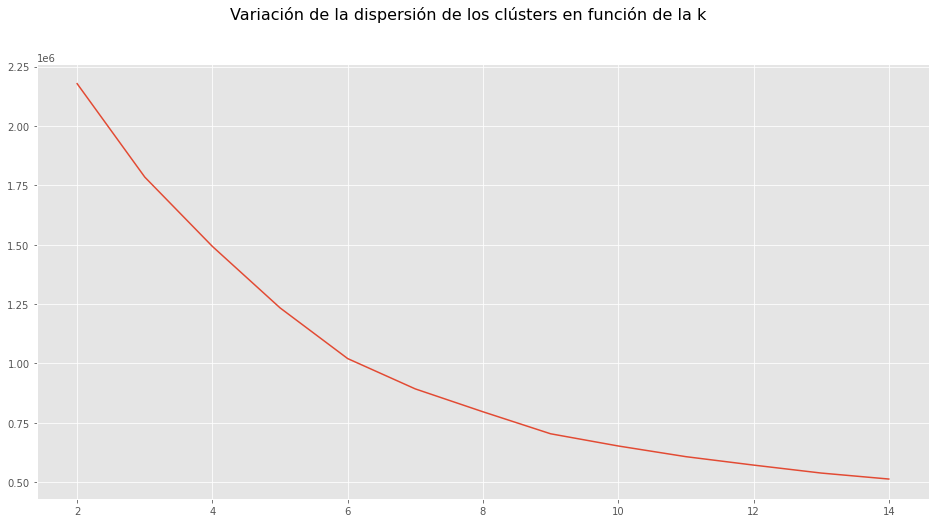

In [ ]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

<a id = "Knn"></a>
# KMeans
[Volver al índice](#toc)


### Se observa como óptima una segmentación en 6 grupos de clientes.

In [ ]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()), 
    ("ArrayToDataFrame", ArrayToDataFrame(columns, index = index)),
    ("FeatureGenerator", FeatureGenerator()),
    #("OutlierFilter", OutlierFilter(q = 0.99, col_to_filter = ["edad"])),
    ("StandardScaler", StandardScaler()),
    ("Clustering", KMeans(n_clusters = 6))
])

In [ ]:
pipe.fit(df_cluster)

Pipeline(memory=None,
         steps=[('Imputer',
                 KNNImputer(add_indicator=False, copy=True,
                            metric='nan_euclidean', missing_values=nan,
                            n_neighbors=5, weights='uniform')),
                ('ArrayToDataFrame',
                 ArrayToDataFrame(columns=['active_customer',
                                           'pk_partition_month', 'total_ahorro',
                                           'total_inversion',
                                           'total_financiacion',
                                           'total_cuentas', 'Num_cobros',
                                           'Numero_bajas', 'Numero_alt...
                                         1050591, 1050592, 1050595, 1050596,
                                         1050597, 1050598, ...])),
                ('FeatureGenerator', FeatureGenerator()),
                ('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, wit

In [ ]:
X_processed = pipe[:3].transform(df_cluster)
X_scaled = pipe["StandardScaler"].transform(X_processed)

In [ ]:
labels = pipe["Clustering"].predict(X_scaled)

In [ ]:
X_processed["cluster"] = labels

In [ ]:
X_processed

fidelización  total_ahorro  ...  activo_web  cluster
15891               1           0.0  ...         1.0        1
16203               5           0.0  ...         1.0        1
16502               8           0.0  ...         1.0        1
17457              17          16.0  ...         1.0        2
17799              17           0.0  ...         1.0        0
...               ...           ...  ...         ...      ...
1553456             1           0.0  ...         1.0        1
1553541             1           0.0  ...         1.0        1
1553559             1           0.0  ...         1.0        1
1553565             1           0.0  ...         0.0        1
1553571             1           0.0  ...         1.0        1

[350384 rows x 10 columns]

In [ ]:
X_processed.to_pickle(path="gdrive/MyDrive/EASY_MONEY_NUCLIO/data/Segmentacion.pkl")

<a id = "resultados"></a>
# Presentación de resultados : Ficha del cliente
[Volver al índice](#toc)


<a id = "rel1"></a>
### Relación de tipos de producto por segmento
[Volver al índice](#toc)


In [ ]:
metricas_a_analizar=['total_ahorro','total_inversion','total_financiacion','total_cuentas']
ficha_df = pd.DataFrame()
for i, col in enumerate(metricas_a_analizar):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [ ]:
ficha_df

cluster                          0          1  ...          4          5
total_ahorro       mean   0.433522   0.256107  ...   0.006692   5.600699
                   std    2.162426   1.194174  ...   0.137273   7.697545
                   min    0.000000   0.000000  ...   0.000000   0.000000
                   25%    0.000000   0.000000  ...   0.000000   0.000000
                   50%    0.000000   0.000000  ...   0.000000   0.000000
                   75%    0.000000   0.000000  ...   0.000000  13.000000
                   max   19.000000  15.000000  ...   6.000000  34.000000
total_inversion    mean   0.020141   0.013515  ...   0.000394  15.885540
                   std    0.329513   0.259562  ...   0.038596   4.622838
                   min    0.000000   0.000000  ...   0.000000   8.000000
                   25%    0.000000   0.000000  ...   0.000000  13.000000
                   50%    0.000000   0.000000  ...   0.000000  17.000000
                   75%    0.000000   0.000000  ...   0.000000  17.000000
                   max    8.000000   9.000000  ...   6.000000  34.000000
total_financiacion mean   0.034527   0.025729  ...   0.000625   1.361730
                   std    0.383931   0.378248  ...   0.052344   3.836957
                   min    0.000000   0.000000  ...   0.000000   0.000000
                   25%    0.000000   0.000000  ...   0.000000   0.000000
                   50%    0.000000   0.000000  ...   0.000000   0.000000
                   75%    0.000000   0.000000  ...   0.000000   0.000000
                   max    9.000000  11.000000  ...   9.000000  17.000000
total_cuentas      mean  20.379081   7.334211  ...  16.832543  26.900393
                   std    7.014925   3.221465  ...   1.493135  15.829391
                   min    0.000000   0.000000  ...  10.000000   0.000000
                   25%   17.000000   5.000000  ...  17.000000  17.000000
                   50%   17.000000   8.000000  ...  17.000000  22.000000
                   75%   21.000000   9.000000  ...  17.000000  34.000000
                   max   68.000000  19.000000  ...  39.000000  85.000000

[28 rows x 6 columns]

In [ ]:
df_resumen=X_processed.groupby('cluster').agg({     
                                         'total_ahorro':np.mean,
                                         'total_inversion':np.mean,
                                         'total_financiacion':np.mean,
                                         'total_cuentas':np.mean,
                                         'num_bajas':np.mean,
                                         'num_altas':np.mean,
                                         'numero_de_cobros':np.mean,
                                        #'edad':np.mean,
                                        'activo_web':np.mean,
                                        'cluster':len 
})

df_resumen.rename(columns={"cluster":'Numero de clientes por cluster'},inplace=True)
df_resumen

total_ahorro  ...  Numero de clientes por cluster
cluster                ...                                
0            0.433522  ...                           87931
1            0.256107  ...                           99150
2            8.087241  ...                           27384
3            8.626225  ...                            4080
4            0.006692  ...                          129550
5            5.600699  ...                            2289

[6 rows x 9 columns]

In [ ]:
df_resumen.reset_index(drop=False,inplace=True)
df_resumen_m=df_resumen.melt(id_vars=['cluster'],
              value_vars=['total_ahorro','total_inversion','total_financiacion','total_cuentas'],
              var_name='Tipo de Producto',
              value_name='Total')
px.bar(df_resumen_m, x="cluster", y="Total", color='Tipo de Producto', orientation='v', 
                              height=600,title='Relación de tipos de productos por segmento')

In [ ]:
fig_len_clus=px.pie(df_resumen,names='cluster',values='Numero de clientes por cluster',title='Clientes por segmento')
fig_len_clus.show()

<a id = "rel2"></a>
### Actividad en la web por segmento
[Volver al índice](#toc)

In [ ]:
fig_web=px.bar(df_resumen,x=df_resumen.index,y='activo_web',title='Actividad en la web por segmento')
fig_web.show()

In [ ]:
df_altas_bajas=df_resumen.melt(id_vars=['cluster'],
              value_vars=['num_bajas','num_altas'],
              var_name='Altas y bajas',
              value_name='Altas y bajas medias')

In [ ]:
df_altas_bajas

cluster Altas y bajas  Altas y bajas medias
0         0     num_bajas              0.396572
1         1     num_bajas              0.132829
2         2     num_bajas              3.578257
3         3     num_bajas              3.398775
4         4     num_bajas              0.018888
5         5     num_bajas              1.452599
6         0     num_altas              0.535499
7         1     num_altas              0.515885
8         2     num_altas              4.355207
9         3     num_altas              3.769608
10        4     num_altas              0.025457
11        5     num_altas              1.921800

In [ ]:
fig_altas_bajas=px.bar(df_altas_bajas,x='cluster',y='Altas y bajas medias',color='Altas y bajas',barmode='group',title='Altas y bajas por segmento')
fig_altas_bajas.show()


gold-filled: 
   
Observamos un cluster Mayoritario, con 129.000 clientes, el cluster 0. Representa el 37% del peso del total de clientes. Se caracteriza por su inactividad en la aplicación, siendo el grupo con menor interacción en nuestra web. También es el grupo más estático, con menos altas y bajas. Tiene una clara preferencia en la contratación de productos sencillos como las cuentas. Es el grupo de los que viven el presente, con menor interés por el ahorro y la financiación. Su edad media son los 23, y su rango mayoritario oscila entre los 22 y los 26.


Oro:
 
El Cambiante: El segundo cluster predominante con 99.000 clientes. (28,3% del peso). Es bastante leal, con escasa tasa de bajas. Tiene una clara preferencia por los servicios sencillos, relativos a cuentas corrientes, con escaso interés por el ahorro y la financiación.  Su grupo de edad mayoritario oscila entre los 20 y los 36. Con una media de 24. Se distinguen del grupo gold-filled en su actividad en la web. Podría encontrarse en una fase de cambio de etapa, pensando en independizarse, comprar una vivienda...  Pueden tener mayor potencial de consumo al navegar con mayor frecuencia por la aplicación. Puede que tenga intención de invertir o buscar rentabilidad sin riesgo para sus ahorros. Por edad es una persona tecnológica que no apostaría por acudir a una oficina tradicional a solucionar sus dudas.

Encontramos en los cluster 2 y 3 el mayor interés por los productos de ahorro, con un comportamiento muy similar en altas y bajas. 
El Espectro de la Rosa// Pantera Rosa (grupo 3, 1,17%): 
 
Encontramos un mayor número de cobros y por tanto un mayor retorno por cliente en este grupo. Principalmente se diferencia del diamante rojo por su preferencia en contratar productos de financiación. Es el cliente ideal por su dependencia a la entidad. Es el cluster más endeudado, con mayor preferencia por las tarjetas de crédito. Su edad oscila entre los 33 y los 48, siendo la media los 40 años.
Es uno de los grupos, junto a Diamante rojo con más altas y bajas.

Diamante rojo: 
 
Grupo 2, con alto interés por los productos de ahorro, muy similar en altas y bajas al cluster Espectro de la Rosa, con una diferencia, no está endeudado. 
Es la figura del ahorrador. Representan cerca del  8% de nuestros clientes, con 27.484 clientes.
Las edades se comprenden entre los 28 y los 44 años, siendo la media de 28 años.  Potencialmente los miembros de este grupo de mayor edad son susceptibles a consumo de productos financieros.

Diamante:
El grupo minoritario, el 4, es claramente el grupo de los inversores; también son ahorradores, pero no en los niveles de diamante rojo y rosa. Es el tercer grupo con mayor ratio de retorno. De 36 a 55 años, con una media de 45. Son los más activos en la web.



Plata
 
Finalmente el grupo 5, es el tercer cluster en número de clientes, con 87.778, representando un peso del 25%. Tiene preferencia por los productos sencillos, cuentas. Se distingue del grupo 0 (gold-field) por su interés en la web. Podría ser un grupo interesante para proponer otros servicios aceptados por el resto de clusters. Su edad se comprende mayoritariamente entre los 22 y los 40, con una media de edad de 28 años. Grupo muy similar al oro, más activo en web y con mayor ratio de cobros, pero causa más bajas. Tiene una clara preferencia por los servicios sencillos, relativos a cuentas corrientes, con escaso interés por el ahorro y la financiación. 


In [ ]:
df_tot

pk_cid pk_partition  ...  Numero_bajas  Numero_altas
0        1375586   2018-01-28  ...             0             0
1        1050611   2018-01-28  ...             0             0
2        1050612   2018-01-28  ...             0             0
3        1050613   2018-01-28  ...             0             0
4        1050614   2018-01-28  ...             0             0
...          ...          ...  ...           ...           ...
5962919  1166765   2019-05-28  ...             0             0
5962920  1166764   2019-05-28  ...             0             0
5962921  1166763   2019-05-28  ...             0             0
5962922  1166789   2019-05-28  ...             0             0
5962923  1550586   2019-05-28  ...             0             0

[5962924 rows x 40 columns]

In [ ]:
X_processed=X_processed.rename_axis('pk_cid').reset_index()

In [ ]:
X_processed

pk_cid  fidelización  ...  activo_web  cluster
0         15891             1  ...         1.0        1
1         16203             5  ...         1.0        1
2         16502             8  ...         1.0        1
3         17457            17  ...         1.0        2
4         17799            17  ...         1.0        0
...         ...           ...  ...         ...      ...
350379  1553456             1  ...         1.0        1
350380  1553541             1  ...         1.0        1
350381  1553559             1  ...         1.0        1
350382  1553565             1  ...         0.0        1
350383  1553571             1  ...         1.0        1

[350384 rows x 11 columns]

In [ ]:
df_tot=pd.merge(df_tot,X_processed[['pk_cid','cluster']],how='left',on='pk_cid')

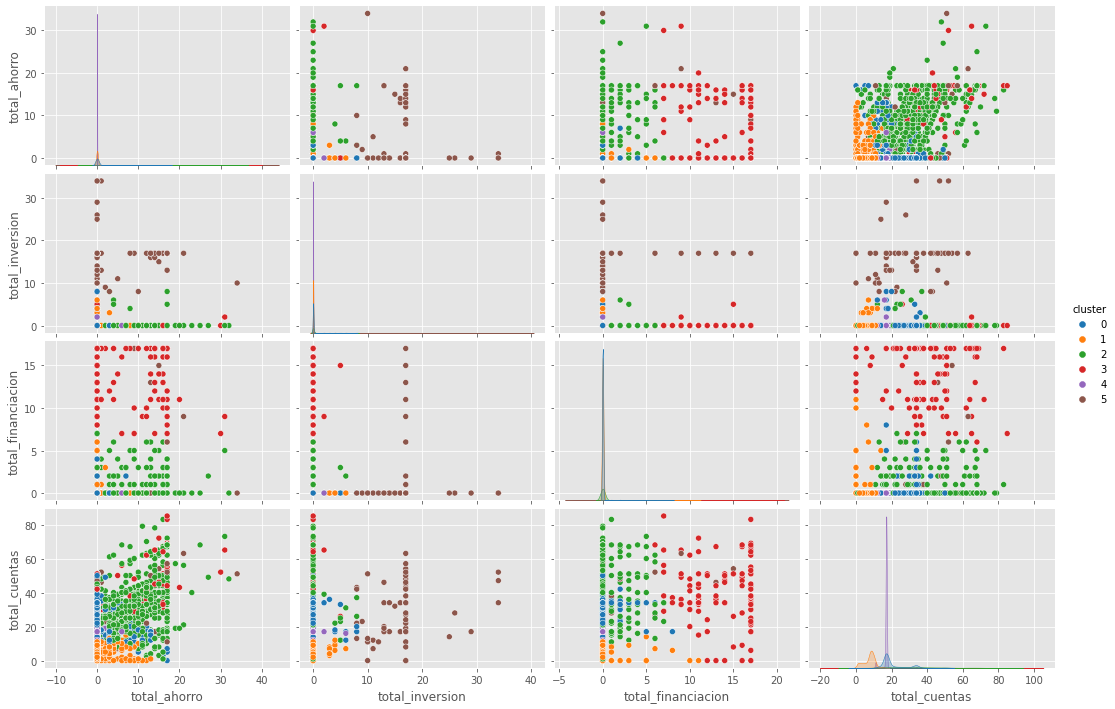

In [ ]:
sns.pairplot(X_processed.sample(10000), vars=X_processed.columns[2:6], hue='cluster', aspect=1.5,palette="tab10")

In [ ]:
df_tot.to_pickle(path="gdrive/MyDrive/EASY_MONEY_NUCLIO/data/df_post_segmentacion_2.pkl") 

<a id = "rel2"></a>
### Relación de productos por grupo de clientes
[Volver al índice](#toc)
 

In [ ]:
prod_por_clus=df_tot.pivot_table(index=['cluster'],values=l_prods,aggfunc=[np.mean])
prod_por_clus.columns=l_prods
prod_por_clus.reset_index(drop=False,inplace=True)
prod_por_clus=prod_por_clus.melt(id_vars=['cluster'],
              value_vars=l_prods,
              var_name='Producto',
              value_name='Total')
px.bar(prod_por_clus, x="cluster", y="Total", color='Producto', orientation='v', 
                              height=600,title='Relación de productos por grupos de clientes')

In [ ]:
df_tot

pk_cid pk_partition  ...  Numero_altas  cluster
0        1375586   2018-01-28  ...             0      0.0
1        1050611   2018-01-28  ...             0      4.0
2        1050612   2018-01-28  ...             0      4.0
3        1050613   2018-01-28  ...             0      1.0
4        1050614   2018-01-28  ...             0      0.0
...          ...          ...  ...           ...      ...
5962919  1166765   2019-05-28  ...             0      4.0
5962920  1166764   2019-05-28  ...             0      0.0
5962921  1166763   2019-05-28  ...             0      0.0
5962922  1166789   2019-05-28  ...             0      4.0
5962923  1550586   2019-05-28  ...             0      1.0

[5962924 rows x 41 columns]


<a id = "rel3"></a>
# Edad por Segmento
[Volver al índice](#toc)


In [ ]:
df_explora=df_tot.sort_values(by=['pk_partition','pk_cid']).groupby('pk_cid').agg({'age':'first',
                                                                                   'salary':np.mean,
                                                                                'cluster':'first','gender':'first'})
fig_edad = px.box(df_explora, x="cluster", y="age",title='Edad por segmento')
fig_edad.show()

In [ ]:
df_explora.head()

age     salary  cluster  gender
pk_cid                                 
15891    59        NaN      1.0     0.0
16063    62        NaN      NaN     0.0
16203    70        NaN      1.0     1.0
16502    57        NaN      1.0     0.0
17457    53  102405.75      2.0     0.0

<a id = "rel4"></a>
# Sexo por segmento
[Volver al índice](#toc)

In [ ]:
df_explora['gender']=df_explora['gender'].replace({0:'Mujer',1:'Hombre'})

In [ ]:
    
px.histogram(df_explora.dropna(), x='cluster', color="gender", barmode='group')